In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as  tf
from tensorflow.keras import datasets,layers,models

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
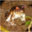

In [5]:
x_train[0]

In [6]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train=y_train.flatten()

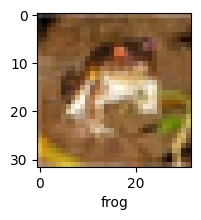

In [7]:
def plot_image(x,y,i):
  plt.figure(figsize=(10,2))
  plt.imshow(x[i])
  plt.xlabel(labels[y[i]])
plot_image(x_train,y_train,0)

In [8]:
x_train=x_train/255
x_test=x_test/255

In [10]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3025 - loss: 1.9310
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4231 - loss: 1.6404
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4536 - loss: 1.5523
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4754 - loss: 1.4847
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4934 - loss: 1.4383


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(i) for i in y_pred]
print(classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      1000
           1       0.72      0.46      0.56      1000
           2       0.30      0.45      0.36      1000
           3       0.44      0.12      0.19      1000
           4       0.35      0.53      0.42      1000
           5       0.34      0.51      0.41      1000
           6       0.56      0.40      0.47      1000
           7       0.45      0.61      0.52      1000
           8       0.71      0.46      0.56      1000
           9       0.62      0.49      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



In [24]:
cnn=models.Sequential([
    #cnn_1
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    #cnn_2
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    #dense layer
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [27]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7195 - loss: 0.8012
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7428 - loss: 0.7357
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7577 - loss: 0.6911
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7679 - loss: 0.6618
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7805 - loss: 0.6263
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7963 - loss: 0.5850
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8075 - loss: 0.5581
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8156 - loss: 0.5289
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8220 - loss: 0.5009
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8380 - loss: 0.4656


In [54]:
y_pre=cnn.predict(x_test)
y_pre_classes=[np.argmax(i) for i in y_pre]
print(classification_report(y_test,y_pre_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.89      0.77      0.82      1000
           2       0.59      0.58      0.59      1000
           3       0.52      0.49      0.51      1000
           4       0.62      0.65      0.64      1000
           5       0.54      0.68      0.60      1000
           6       0.70      0.82      0.76      1000
           7       0.85      0.64      0.73      1000
           8       0.82      0.79      0.80      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [55]:
y_pre=[np.argmax(i) for i in y_pre]

In [56]:
y_pre[:15]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 3, 7, 9]

In [57]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

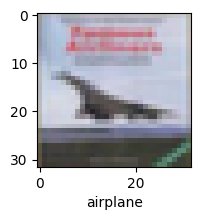

In [60]:
plot_image(x_test,y_pre,3)

<Figure size 3000x3000 with 0 Axes>

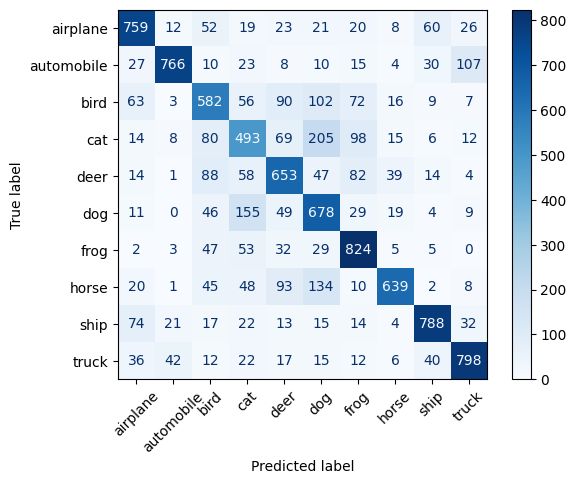

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pre,labels=[0,1,2,3,4,5,6,7,8,9])
disp=ConfusionMatrixDisplay(confusion_matrix=cn,display_labels=labels)
plt.figure(figsize=(30, 30))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()